In [1]:
from analysis.musical import calculate_intervals, CONSONANCE_ORDER
from model import get_spikes_abs
root_note = "C4"
intvls = calculate_intervals(root_note)

most_consonant = intvls[CONSONANCE_ORDER[0]]
least_consonant = intvls[CONSONANCE_ORDER[-1]]

root_spikes = get_spikes_abs(root_note)
most_consonant_spikes = get_spikes_abs(most_consonant)
least_consonant_spikes = get_spikes_abs(least_consonant)

from analysis.temporal import create_concurrency_profile

root_profile = [create_concurrency_profile(cf) for cf in root_spikes]
most_consonant_profile = [create_concurrency_profile(cf) for cf in most_consonant_spikes]
least_consonant_profile = [create_concurrency_profile(cf) for cf in least_consonant_spikes]


In [2]:
from analysis.spectral import decode
import numpy as np

from model import get_decoded_exp
BASE = 8

root_decoded = get_decoded_exp(root_note)
most_consonant_decoded = [decode(conc_prof, BASE) for conc_prof in most_consonant_profile]
least_consonant_decoded = [decode(conc_prof, BASE) for conc_prof in least_consonant_profile]

# Plot root_decoded and most_consonant_decoded in seprate colours with most_consonant_decoded overlapping root_decoded and a wide figure size

x = np.arange(len(root_decoded))
print(np.shape(root_decoded))


(3500,)


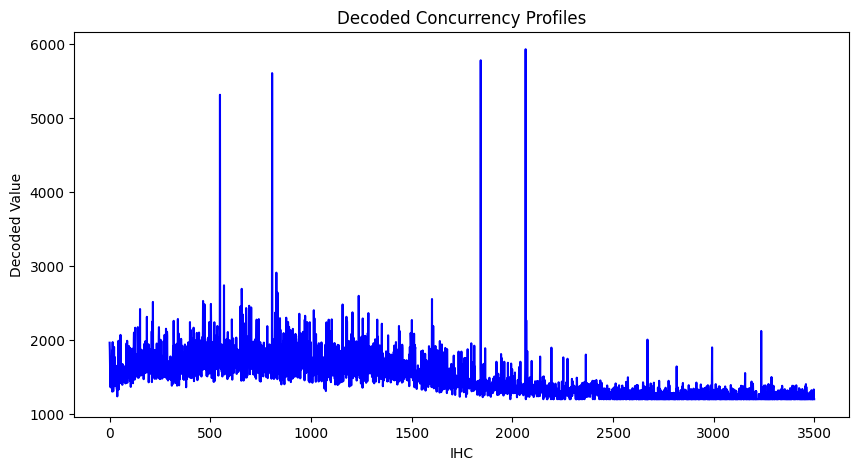

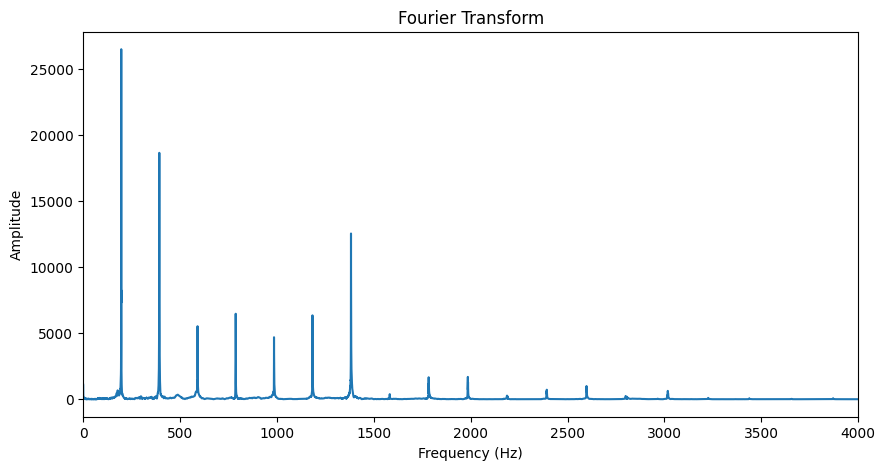

In [3]:
import os
import matplotlib.pyplot as plt

from analysis.spectral import fourier_note
from model import SPIKES_ABS_DIR

root_note = "G3"

x = np.arange(len(root_decoded))
spikes = np.load(os.path.join(SPIKES_ABS_DIR, f"{root_note}.npy"))
decoded = np.array([])

for cf in spikes:
    conc_profile = create_concurrency_profile(cf)
    decoded_profile = decode(conc_profile, 12)
    decoded = np.append(decoded, decoded_profile)
    
root_decoded = decoded
# normalize root_decoded to 0-100
# root_decoded = [100 * (rd - min(root_decoded)) / (max(root_decoded) - min(root_decoded)) for rd in root_decoded]
plt.figure(figsize=(10, 5))
plt.plot(x, root_decoded, color='blue')
plt.title("Decoded Concurrency Profiles")
plt.xlabel("IHC")
plt.ylabel("Decoded Value")
plt.show()

fourier_note(root_note, True)

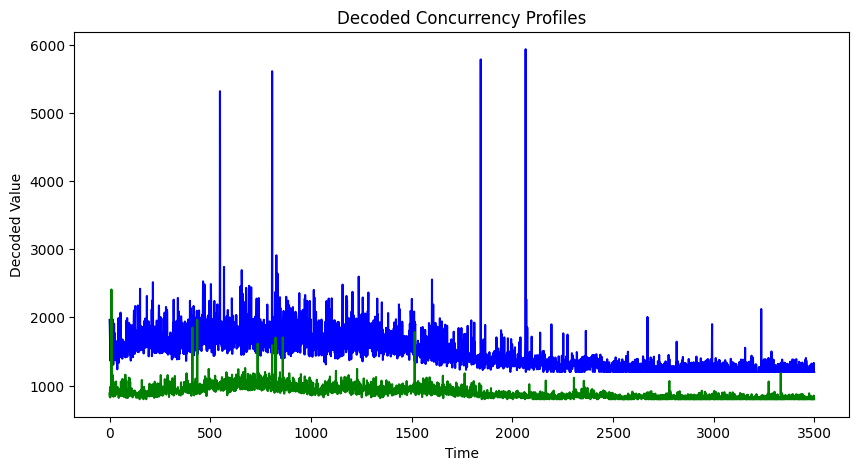

In [4]:
x = np.arange(len(root_decoded))
plt.figure(figsize=(10, 5))
plt.plot(x, root_decoded, color='blue')
plt.plot(x, most_consonant_decoded, color='green')
plt.title("Decoded Concurrency Profiles")
plt.xlabel("Time")
plt.ylabel("Decoded Value")
plt.show()

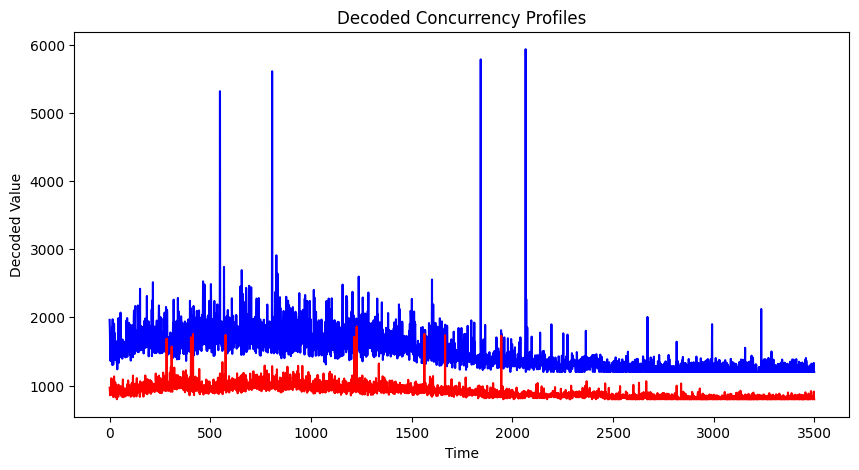

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(x, root_decoded, color='blue')
plt.plot(x, least_consonant_decoded, color='red')
plt.title("Decoded Concurrency Profiles")
plt.xlabel("Time")
plt.ylabel("Decoded Value")
plt.show()


In [ ]:
from analysis.musical import calculate_intervals, CONSONANCE_ORDER
from model import get_decoded_exp
import numpy as np
import matplotlib.pyplot as plt

root_note = "C4"

note_intls = calculate_intervals(root_note)
for intvl in CONSONANCE_ORDER:
    decode = get_decoded_exp(note_intls[intvl])
    x = np.arange(len(decode))
    plt.figure(figsize=(10, 5))
    plt.plot(x, decode, color='blue')
    plt.title(f"Consonance Scores for {note_intls[intvl]}")
    plt.xlabel("IHC")
    plt.ylabel("Consonance Score")
    plt.show()



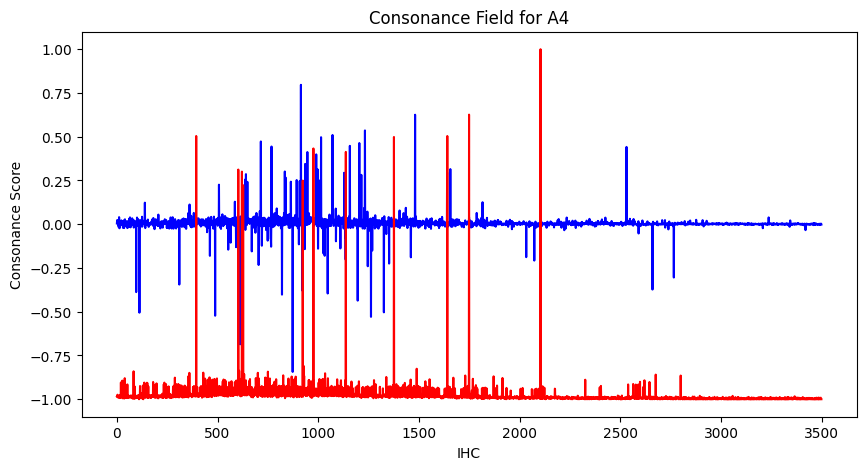

In [8]:

from analysis.musical import calculate_intervals, CONSONANCE_ORDER, CONS_RANK
from model import get_decoded_exp
import numpy as np
import matplotlib.pyplot as plt
from model.bez2018model import get_ERB_cf_list

# x = get_ERB_cf_list(num_cf=3500, min_cf=125, max_cf=16e3)

def consonance_field(note):
    intervals = calculate_intervals(note)
    notes = [intervals[interval] for interval in CONSONANCE_ORDER]

    decoded = [get_decoded_exp(note) for note in notes]

    mean = sum(CONS_RANK) / len(CONS_RANK)
    factors = [(rank - mean) for rank in CONS_RANK]

    factored = np.array([factor * note_decoded for factor, note_decoded in zip(factors, decoded)])
    field = np.sum(factored, axis=0) / 12
    return field

root_note = "A4"
field = consonance_field(root_note)
root_decoding = get_decoded_exp(root_note)
x = np.arange(len(root_decoding))

plt.figure(figsize=(10, 5))
# plt.xlim(0, 2e3)
plt.plot(x, field, color='blue')
plt.plot(x, root_decoding, color='red')
plt.title(f"Consonance Field for {root_note}")
plt.xlabel("IHC")
plt.ylabel("Consonance Score")
plt.show()

# from analysis.spectral import fourier_note
# fourier_note("C4", True)